In [ ]:
#Import Libraries

In [ ]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

# Load and review Data

In [ ]:
pdata = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [ ]:
pdata.shape

In [ ]:
pdata['Personal Loan'] = pdata['Personal Loan'].astype('category')

In [ ]:
pdata.dtypes

In [ ]:
pdata['Personal Loan'] = pdata['Personal Loan'].replace({1: 'Y', 0: 'N'})
pdata.head()

In [ ]:
pdata=pdata.drop(labels='ZIP Code',axis=1)
pdata=pdata.drop(labels='ID',axis=1)

In [ ]:
pdata.head()

In [ ]:
pdata.groupby(["Personal Loan"]).count()

# Class distribution among B and M is almost 2:1. The model will better predict B and M

drop the first column from the data frame. This is Id column which is not used in modeling

In [ ]:
pdata.shape

In [ ]:
# Create a separate dataframe consisting only of the features i.e independent attributes

X = pdata.drop(labels= "Personal Loan" , axis = 1)
y = pdata["Personal Loan"]
X.head()


In [ ]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

In [ ]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)

# Build kNN Model

In [24]:
NNH = KNeighborsClassifier(n_neighbors = 8, weights = 'distance' )


In [25]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8, weights='distance')

# Evaluate Performance of kNN Model

In [26]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.954

Confusion Matrix
[[  87   62]
 [   7 1344]]


<AxesSubplot:>

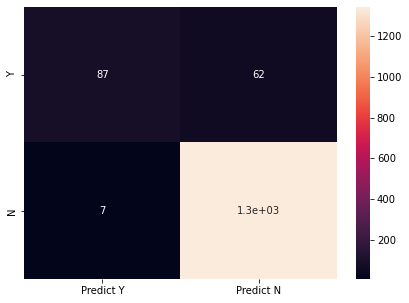

In [27]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=["Y", "N"])
print(cm)

df_cm = pd.DataFrame(cm, index = [i for i in ["Y","N"]],
                  columns = [i for i in ["Predict Y","Predict N"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

# Choosing K-Value

In [28]:
scores=[]

In [29]:
for k in range(1,50):
    N_N_H=KNeighborsClassifier(n_neighbors=k,weights="distance")
    N_N_H.fit(X_train,y_train)
    scores.append(N_N_H.score(X_test,y_test))
    

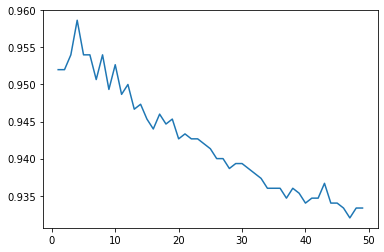

In [30]:
plt.plot(range(1,50),scores)

In [31]:
import pylab as pl
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
random_state = np.random.RandomState(0)

In [34]:
classifier3 = KNeighborsClassifier(n_neighbors= 4 , weights = 'distance' )
probas1_ = classifier3.fit(X_train, y_train).predict_proba(X_test)
# Compute ROC curve and area the curve for logistic
fpr3, tpr3, thresholds1 = roc_curve(y_test, probas1_[:, 1])
roc_auc3 = auc(fpr3, tpr3)
print("Area under the ROC curve : %f" % roc_auc3)
print('Gini Coeffiecient=',2*(roc_auc3)-1)

ValueError: y_true takes value in {'N', 'Y'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [35]:
# Plot ROC curve
pl.clf()
pl.plot(fpr1, tpr1, label='ROC curve for logistic (area = %0.2f)' % roc_auc1)

pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

NameError: name 'fpr1' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
i = np.arange(len(tpr1)) # index for df
roc1 = pd.DataFrame({'fpr1' : pd.Series(fpr1, index=i),'tpr1' : pd.Series(tpr1, index = i), '1-fpr1' : pd.Series(1-fpr1, index = i), 'tf1' : pd.Series(tpr1 - (1-fpr1), index = i), 'thresholds1' : pd.Series(thresholds1, index = i)})
print(roc1.loc[(roc1.tf1-0).abs().argsort()[:1]])

